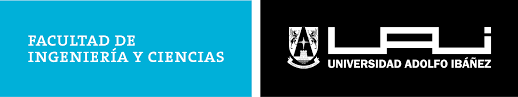


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

## **Tópicos**

  - Intervalos de confianza y error
  - Test de hipótesis

###### **Resumen métricas estadísticas**

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Puntajes PSU

df_punt = pd.DataFrame({'Nombre': ['Anita', 'Bastian', 'Carlos', 'Andrea','Ignacia',"Antonio", "Nicholas", "Vicente", "Diego", "Francisca", "Antonia", "Catalina", "Maria", "Carolina", "Matias", "Joaquin"],
                 'Sexo':          ['M','H', 'H','M','M','H','H','H','H',"M","M","M","M","M","H","H"],
                 'Edad':          [17, 19,17,17,20,17,21,19,20,20,20,21,18,20,18,21],
                 'Puntaje':       [630, 450, 550, 680, 710,450,600,630,700,550,650,310,300,480,780,850]})
df_punt

,Nombre,Sexo,Edad,Puntaje
0,Anita,M,17,630
1,Bastian,H,19,450
2,Carlos,H,17,550
3,Andrea,M,17,680
4,Ignacia,M,20,710
5,Antonio,H,17,450
6,Nicholas,H,21,600
7,Vicente,H,19,630
8,Diego,H,20,700
9,Francisca,M,20,550


In [3]:
# Media poblacional

Edad = df_punt['Edad']  #<== Selección de una columna en particular NUMERICA
Edad.mean() #<== Calculo de la media/promedio de la población

19.0625

In [4]:
# Desviación estándar

Edad.std()

1.526160760426852

In [5]:
#También puede calcular el valor acumulado: (Ignorar el valor NAN)

df_punt[['Edad', 'Puntaje']].cumsum()  # <== buscar otro contexto para frecuencia acumulada


,Edad,Puntaje
0,17,630
1,36,1080
2,53,1630
3,70,2310
4,90,3020
5,107,3470
6,128,4070
7,147,4700
8,167,5400
9,187,5950


In [6]:
#Resumen de metricas estadísticas

df_punt.describe()

,Edad,Puntaje
count,16.000000,16.000000
mean,19.062500,582.500000
std,1.526161,155.198797
min,17.000000,300.000000
25%,17.750000,472.500000
50%,19.500000,615.000000
75%,20.000000,685.000000
max,21.000000,850.000000


In [7]:
# [INSERTAR IMAGEN DE RESUMEN DE MEDIDAS]

In [8]:
# Los métodos corr y cov del marco de datos pueden devolver una matriz completa de similitud o varianza:
display(df_punt.corr())
display(df_punt.cov())

,Edad,Puntaje
Edad,1.000000,0.092179
Puntaje,0.092179,1.000000


,Edad,Puntaje
Edad,2.329167,21.833333
Puntaje,21.833333,24086.666667


In [9]:
# Usando el método corrwith de Dataframe, podemos calcular la similitud entre diferentes columnas o filas en el marco de datos. Pasar una serie:

df_punt.corrwith(df_punt.Puntaje)

Edad       0.092179
Puntaje    1.000000
dtype: float64

### Intervalos de confianza y error 

**¿Cómo cuantificamos el error muestral?:** Podemos usar intervalos de
confianza.


Vamos a construir un intervalo de confianza para la **media**

Tres casos:
- Caso 1: Datos normales y varianza conocida.
- Caso 2: Datos normales y varianza desconocida.
- Caso 3: Datos de cualquier distribución pero tamaño de muestra grande.

- **Caso 1**: datos normales con varianza conocida.
$$a_n=\bar{X}- z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}\qquad \text{y}\qquad b_n=\bar{X}+ z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}$$
- **Caso 2** datos normales con varianza desconocida.
$$a_n=\bar{X}- t_{1-\alpha/2,n-1}\frac{S}{\sqrt{n}}\qquad \text{y}\qquad b_n=\bar{X}+ t_{1-\alpha/2,n-1}\frac{S}{\sqrt{n}}$$
- **Caso 3** datos de cualquier distribucion pero tamano de muestra grande.
$$a_n=\bar{X}- z_{1-\alpha/2}\frac{S}{\sqrt{n}}\qquad \text{y}\qquad b_n=\bar{X}+ z_{1-\alpha/2}\frac{S}{\sqrt{n}}$$

Para los casos 1 y 3 ocuparemos la distribución normal y para el caso 2
usaremos la distribución t-student

Usamos la librería **stats** del paquete **scipy**

In [29]:
from scipy import stats

In [43]:
punt = df_punt[["Puntaje"]] # <== Selección de columna a utilizar
punt.mean() 

Puntaje    582.5
dtype: float64

In [31]:
alpha=0.2
confidence=1 - alpha   # <== error
n=len(punt)

stats.norm.interval(confidence,punt.mean(),stats.sem(punt))

(array([532.7761846]), array([632.2238154]))

* Lo mismo pero hecho a mano

In [32]:
#Calculamos el límite inferior 
LI=punt.mean()-stats.norm.ppf(1-alpha/2)*stats.sem(punt)
LI

Puntaje    532.776185
dtype: float64

In [33]:
#Calculamos el límite superior
LS=punt.mean()+stats.norm.ppf(1-alpha/2)*stats.sem(punt)
LS

Puntaje    632.223815
dtype: float64

* Varianza

In [44]:
#La varianza de los puntajes esta dada por
punt.var()

Puntaje    24086.666667
dtype: float64

El intervalo de confianza para la varianza esta dado por 
$$a_n=\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2},n-1}}\qquad\text{y}\qquad b_n=\frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2},n-1}}$$
donde 
- $\chi^2_{1-\frac{\alpha}{2},n-1}$ se calcula usando $\texttt{stats.chi2.ppf(1-alpha/2,n-1)}$
-$\chi^2_{\frac{\alpha}{2},n-1}$ se calcula usando $\texttt{stats.chi2.ppf(alpha/2,n-1)}$

In [39]:
#Seteamos la confianza y la significancia
alpha=0.1
confianza=1-alpha
S2=punt.var()
n=len(punt)

In [40]:
#Calculamos el limite inferior
LI=(n-1)*S2/stats.chi2.ppf(1-alpha/2,n-1)
LI

Puntaje    14454.434046
dtype: float64

In [41]:
#Calculamos el limite superior
LS=(n-1)*S2/stats.chi2.ppf(alpha/2,n-1)
LS

Puntaje    49759.370627
dtype: float64

**Visualización** 

In [23]:
from plotnine import *

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 4'. Pick better value with 'binwidth'.


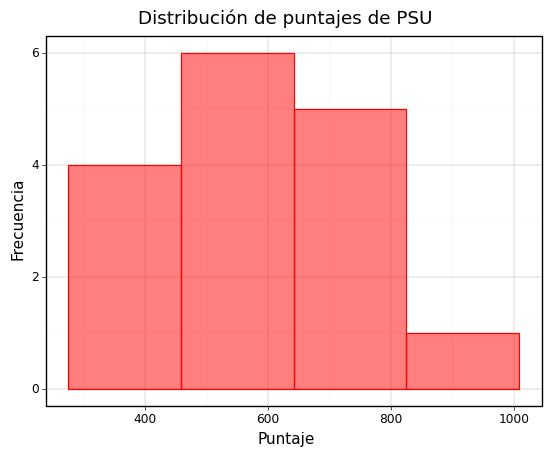

<ggplot: (8763003162868)>

In [26]:
(ggplot(punt)+
 aes(x="Puntaje")+
 geom_histogram(color="red",fill="red",alpha=0.5)+ 
 theme_linedraw()+
 ggtitle("Distribución de puntajes de PSU")+
 xlab("Puntaje")+
 ylab("Frecuencia")
)

### Test de hipótesis

• Una **hipótesis** estadística es una afirmación sobre los parámetros de una o más 
poblaciones. En vez de hacer una estimación de un parámetro se hace una afirmación.

• Utilizaremos la información proporcionada de una muestra aleatoria para decidir si 
esta afirmación es verdadera o falsa.

In [46]:
df_punt # <== data a utilizar

,Nombre,Sexo,Edad,Puntaje
0,Anita,M,17,630
1,Bastian,H,19,450
2,Carlos,H,17,550
3,Andrea,M,17,680
4,Ignacia,M,20,710
5,Antonio,H,17,450
6,Nicholas,H,21,600
7,Vicente,H,19,630
8,Diego,H,20,700
9,Francisca,M,20,550


In [50]:
punt=df_punt['Puntaje']
media=punt.mean()
ds=punt.std()

In [48]:
#Podemos concluir que el parametro pobalcional es igual a 30 años?
stats.ttest_1samp(punt,30,alternative='two-sided')

Ttest_1sampResult(statistic=array([14.23980108]), pvalue=array([4.03604992e-10]))

**Test de Bondad de ajuste**

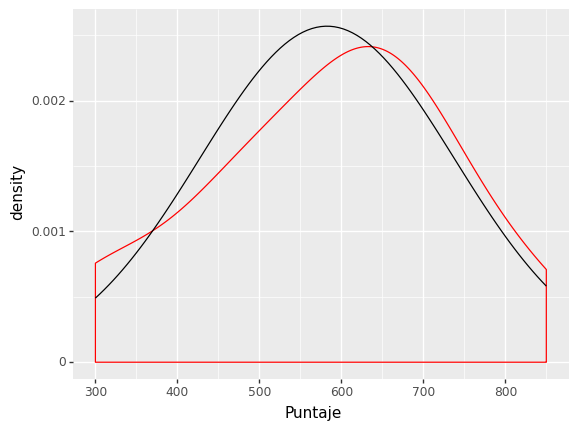

<ggplot: (8763002714612)>

In [52]:
#Siguen nuestros datos una distribucion normal?
from plotnine import *
(ggplot(df_punt)+
 aes(x='Puntaje')+
 geom_density(color='red')+
 stat_function(fun=stats.norm.pdf,args = dict(loc=media, scale=ds)))

In [53]:
#Definimos 6 regiones: (-Inf,0),(0,20),(20,40),(40,60),(60,80),(80,Inf)
p1=stats.norm.cdf(0,loc=media,scale=ds)
print(p1)
p2=stats.norm.cdf(20,loc=media,scale=ds)-stats.norm.cdf(0,loc=media,scale=ds)
print(p2)
p3=stats.norm.cdf(40,loc=media,scale=ds)-stats.norm.cdf(20,loc=media,scale=ds)
print(p3)
p4=stats.norm.cdf(60,loc=media,scale=ds)-stats.norm.cdf(40,loc=media,scale=ds)
print(p4)
p5=stats.norm.cdf(80,loc=media,scale=ds)-stats.norm.cdf(60,loc=media,scale=ds)
print(p5)
p6=1-stats.norm.cdf(80,loc=media,scale=ds)
print(p6)


8.727804961077874e-05
5.754757853138032e-05
9.174672286894683e-05
0.00014386387064703463
0.00022187614032486048
0.999397687638017


In [56]:
#Calculamos el tamano de muestra
n=len(punt)
n

16

In [55]:
#Calculamos las frecuencias esperadas
E1=n*p1
E2=n*p2
E3=n*p3
E4=n*p4
E5=n*p5
E6=n*p6

FE=[E1,E2,E3,E4,E5,E6]
FE

[0.0013964487937724599,
 0.0009207612565020852,
 0.0014679475659031493,
 0.002301821930352554,
 0.0035500182451977677,
 15.990363002208271]

In [57]:
FO=pd.cut(pd.array(punt), bins=[-np.inf,0,20,40,60,80,np.inf]).value_counts()
FO=np.array(FO)
FO

array([ 0,  0,  0,  0,  0, 16])

In [58]:
#Aplicamos el test
stats.chisquare(FO,FE)

Power_divergenceResult(statistic=0.009642805772849206, pvalue=0.9999995159815346)

## Ejercicios

1.- 

2.-


3.-

4.-

5.-
